<a href="https://colab.research.google.com/github/ugurtegin/Nonlinear_MMF_Network/blob/main/NoExp/COVID_19_CTImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import tensorflow as tf

from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Activation, LSTM
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import scipy.io as sio
import h5py

f = h5py.File('/content/drive/My Drive/Research/WO_Res/Covid19/alldata.mat')
inp = f['alldata']


f2 = sio.loadmat('/content/drive/My Drive/Research/WO_Res/Covid19/label.mat')
out = f2['y']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  after removing the cwd from sys.path.


In [3]:
datasize = len(np.transpose(inp))

In [4]:
inp2 = np.transpose(inp, (2, 1, 0))

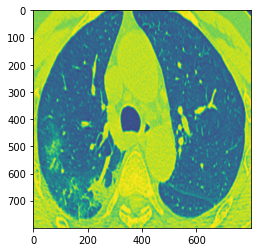

In [5]:
plt.imshow(np.squeeze(inp2[0,]))
plt.show()

In [6]:
input_data =  np.expand_dims(inp2, -1)
output_data = out

print('input_data : ', input_data.shape, input_data.dtype)
print('output_class : ', output_data.shape, output_data.dtype)
print()

input_data :  (544, 800, 800, 1) float64
output_class :  (544, 1) uint8



In [7]:
oran = 0.20
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=oran)

print('Test data : ', X_test.shape, X_test.dtype)
print('Training data : ', X_train.shape, X_train.dtype)
print()

Test data :  (109, 800, 800, 1) float64
Training data :  (435, 800, 800, 1) float64



In [8]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(800, 800, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [9]:
loss='binary_crossentropy' # mean_absolute_error, cosine_proximity
metrics = ['accuracy']  # network accuracy metric to be determined after each epoch

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt2, loss=loss, metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 798, 798, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 399, 399, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 10188864)          0         
_________________________________________________________________
dense (Dense)                (None, 1)                 10188865  
Total params: 10,189,505
Trainable params: 10,189,505
Non-trainable params: 0
_________________________________________________________________


In [10]:
#setting final parameters for the network and it begins to train
number_of_iterations = 20
batch_size = 32

#history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=number_of_iterations)
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_iterations, verbose=0, validation_data=(X_test, y_test))
#Number of iterations run: 900

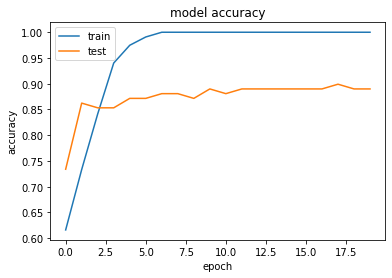

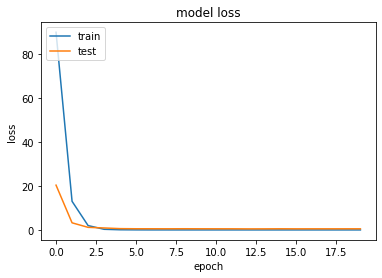

In [11]:
from google.colab import files
ac=plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
ac.show()
#ac.savefig('acc-1.png')
#files.download('acc-1.png')

# summarize history for loss
ls=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
ls.show()
#ls.savefig('loss-1.png')
#files.download('loss-1.png')

In [12]:
abit = model.predict(X_test)
abit.shape


(109, 1)

In [13]:
print(np.round(abit[1]))
print(y_test[1])

[1.]
[1]


In [14]:
from sklearn.metrics import mean_squared_error
mean_squared_error(np.round(abit), y_test)

0.110091746

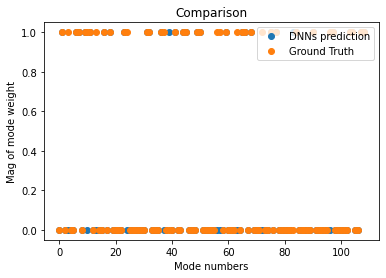

In [15]:
bbs=plt.figure()
plt.plot(np.round(abit), 'o')
plt.plot(y_test, 'o')
plt.title('Comparison')
plt.ylabel('Mag of mode weight')
plt.xlabel('Mode numbers')
plt.legend(['DNNs prediction', 'Ground Truth'], loc='upper right')
plt.show()
#bbs.savefig('compa-1.png')
#files.download('compa-1.png')